# Continue analysis on Twitter Network: Wordclouds, or Adjective analysis (SpaCy)?

In [204]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Import tweets from NLP analysis:

In [2]:
tweets_analysis = pd.read_csv('tweets_analysis.csv')
tweets_analysis.head()
tweets_analysis.drop('Unnamed: 0', axis=1, inplace=True)

#### Can I make a word cloud from my saved tweets, or do I have to use the Twitter API again and search by words and geocode?

In [4]:
# wordcloud = wordcloud.WordCloud(max_font_size = 150, max_words = 100, backgroun_color='white').generate(str())

In [ ]:
# https://towardsdatascience.com/create-your-own-word-cloud-705798556574

### Consider doing analysis to compare the most common adjectives (SpaCy).
* my hypothesis is that the German network will use more negative adjectives.
* any other underlying theories? 

Helpful links:
* https://medium.com/illumination/scraping-news-and-creating-a-word-cloud-in-python-10ea312c49ba
* https://www.geeksforgeeks.org/generating-word-cloud-python/

### Import large dataframe with tweets (that have not yet been processed for NLP:

In [97]:
tweets = pd.read_csv('tweets_to_preprocess_NLP.csv')

In [98]:
tweets.head()
tweets.drop(['Unnamed: 0', 'Handle', 'ID', 'CreatedAt', 'Geocode', 'Follower', 'Location', 'UserDescription', 'Location_code', 'Friend'], axis=1, inplace=True)

In [99]:
tweets.shape

(8425, 2)

In [100]:
tweets['Country'].value_counts()

Germany    6002
USA        2423
Name: Country, dtype: int64

In [101]:
tweets_USA = tweets[tweets['Country']=='USA']
tweets_DE = tweets[tweets['Country']=='Germany']

In [102]:
# remove RT and punction, make all words lowercase, tokenize:

In [103]:
import re
# Use function from notebook "Sentiment-Analysis-on-Twitter-Network.ipynb"
def clean_up(x):
    """ Clean up the text before NLP. 
    Remove Punctuation, remove retweet and @.
    Keep German characters as vowels."""
    
    remove_rt = lambda x: re.sub('RT @\w+: ', "", x)
    lab = lambda x: re.sub('[^äöüÄÖÜA-Za-z ]+','', x)
    tw_1 = remove_rt(x)
    tw_2 = lab(tw_1)
    tw_3 =  tw_2.lower()
    
    return tw_3
    

In [104]:
tweets_USA['text'] = tweets_USA['TweetText'].apply(clean_up)

In [105]:
tweets_DE['text'] = tweets_DE['TweetText'].apply(clean_up)

### Define the Stopwords (German and English) to exclude from WordClouds

In [149]:
stopwords = set(STOPWORDS)
lst_stopwords = list(stopwords)

In [173]:
from nltk.corpus import stopwords
stopset = stopwords.words('german')
# stopset

In [172]:
stopwords_de_en = []
stopwords_de_en.extend(lst_stopwords)
stopwords_de_en.extend(stopset)
# stopwords_de_en

In [160]:
# Can I somehow manually exclude words ['amp', 'mehr', 'u'] that were central in both clouds. 
exclude = ['amp', 'mehr', 'u']
stopwords_de_en.extend(exclude)

In [162]:
stopwords_de_en = stopwords_de_en[1:]
# stopwords_de_en

### Make WordClouds for my American/German Network's Tweets:

In [165]:
# WordCloud of Tweets from my American Twitter Network:

comment_words = ''
stopwords = stopwords_de_en

# iterate through USA dataframe:
for val in tweets_USA['text']:
    
    
    if val not in stopwords_de_en:
        # make each value a string
        val = str(val)
    
        # split words
        tokens = val.split()
    
        comment_words += " ".join(tokens)+" "

wordcloud_USA = WordCloud(width=800, height=800,
                         background_color ='white',
                         stopwords=stopwords,
                         min_font_size=10).generate(comment_words)

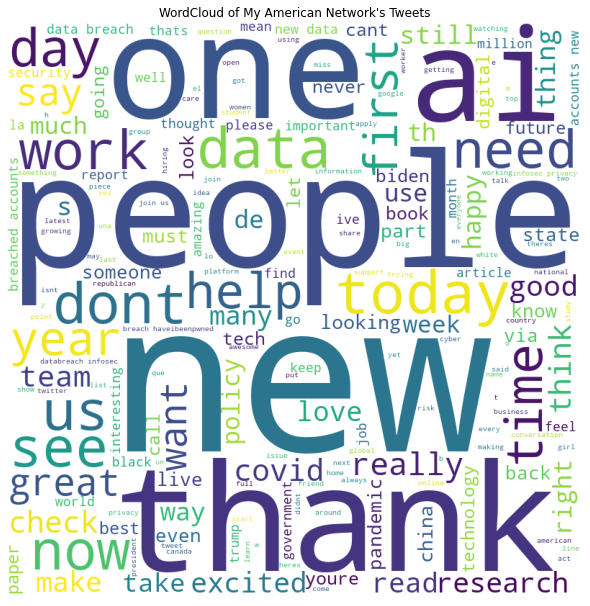

In [166]:
# Plot USA wordcloud:

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud_USA)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("WordCloud of My American Network's Tweets")
plt.savefig('My_American_Twitter_WordCloud.png')
plt.show()

In [ ]:
# Because the Germany tweets are both in German and English, plot words that are in NEITHER the german stopwords list NOR the english stopwords list!

In [174]:
# stopwords_de_en

In [170]:
# WordCloud of Tweets from my German Twitter Network:

comment_words = ''
stopwords = stopwords_de_en

# iterate through German dataframe:
for val in tweets_DE['text']:
    
    
    if val not in stopwords_de_en:
        
        # make each value a string
        val = str(val)
    
        # split words
        tokens = val.split()
    
        comment_words += " ".join(tokens)+" "

wordcloud_DE = WordCloud(width=800, height=800,
                         background_color ='white',
                         stopwords=stopwords,
                         min_font_size=10).generate(comment_words)

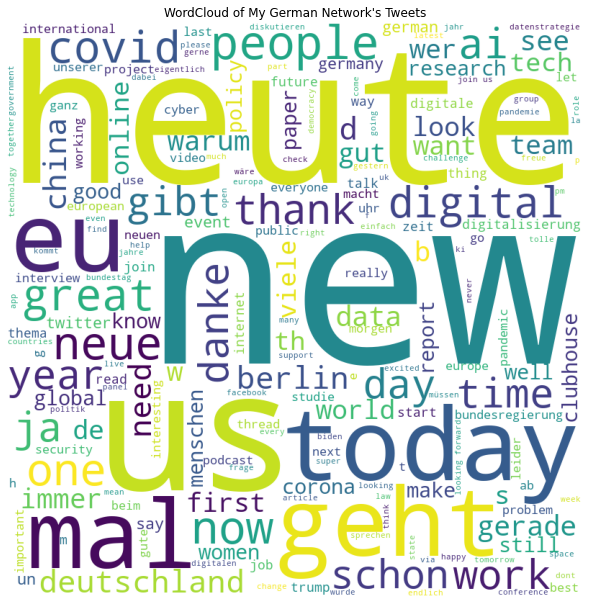

In [171]:
# Plot German wordcloud:

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud_DE)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("WordCloud of My German Network's Tweets")
plt.savefig('My_German_Twitter_WordCloud.png')
plt.show()

## Next Analysis: SpaCy POS analysis:

Would be interesting to see which are the most common adjectives used by the 2 demographics...
* Use package SpaCy
* step 1: Part-of-speech (POS) Tagging
* step 2: Named Entity Recognition (NER) (labelling named "real-world" objects, like persons, companies or locations.
* link: https://spacy.io/usage/spacy-101
* link: https://spacy.io/usage/linguistic-features#pos-tagging

In [176]:
import spacy

In [ ]:
# !python3 -m spacy download en_core_web_sm

In [195]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Tokenization
# spaCy tokenizes the text and creates a document object
tweets_USA['doc'] = [nlp(text) for text in tweets_USA['text']]

In [237]:
tweets_USA.head()
# NOTE that the index got messed up. 
# Need to reset_index for both USA and DE dataframes 

,TweetText,Country,text,doc
21,"@donie Does he feel, like he's a rider, on a D...",USA,donie does he feel like hes a rider on a dowww...,"(donie, does, he, feel, like, he, s, a, rider,..."
22,"Me a year ago: ""Yeahhh, I'll still shave every...",USA,me a year ago yeahhh ill still shave every day...,"(me, a, year, ago, yeahhh, ill, still, shave, ..."
23,#MachineLearning #DataScience https://t.co/VF0...,USA,machinelearning datascience httpstcovfvkdpmoh,"(machinelearning, datascience, httpstcovfvkdpmoh)"
24,RT @WalterReade: Here's an awesome @kaggle not...,USA,heres an awesome kaggle notebook showing how t...,"(heres, an, awesome, kaggle, notebook, showing..."
25,Kaggle has a new #MachineLearning competition ...,USA,kaggle has a new machinelearning competition t...,"(kaggle, has, a, new, machinelearning, competi..."


In [213]:
tokens = [token for token in tweets_USA['doc']]

In [255]:
# Print sample of part-of-speech tags:

In [272]:
tweets_USA['text'][21]

'donie does he feel like hes a rider on a dowwwnnbound train'

In [265]:
# Define a sample to make sure it works. 
sample = tweets_USA['text'][21]

In [266]:
document = nlp(sample)

In [267]:
for token in document:
    if token.pos_ == 'NOUN':
        print(token, token.pos_)

# dowwwnnbound would be ADJ, not NOUN. Otherwise good

donie NOUN
rider NOUN
dowwwnnbound NOUN
train NOUN


In [268]:
document_all_tweets = tweets_USA['text'].apply(nlp)

In [269]:
adjectives_USA = []

for doc in document_all_tweets:
    for token in doc:
        if token.pos_ == 'ADJ':
            adjectives_USA.append(token)

In [273]:
adjectives_USA

[ill,
 awesome,
 tabular,
 new,
 smart,
 true,
 many,
 great,
 virtual,
 good,
 easier,
 happy,
 simple,
 lightweight,
 perfect,
 newest,
 easier,
 ai,
 big,
 artificial,
 neural,
 best,
 separate,
 related,
 artificial,
 crazy,
 top,
 nowhttpstcoehpmzkgglobaliqx,
 denisegarth,
 xbond,
 potential,
 testimonial,
 financial,
 ultimate,
 advisory,
 local,
 near,
 financial,
 advisory,
 financial,
 higher,
 httpstcoujehborubk,
 advisortech,
 many,
 more,
 financial,
 last,
 initial,
 current,
 new,
 roundtable,
 successful,
 financial,
 httpstcoxecjdwelgu,
 great,
 relevant,
 zedian,
 singular,
 und,
 zedian,
 underrated,
 german,
 federal,
 bundestag,
 insightful,
 german,
 farright,
 interesting,
 amazing,
 relevant,
 tombolamusikant,
 nabertronic,
 seine,
 frau,
 biden,
 anncathrin,
 frau,
 natürlich,
 nice,
 jasonhealey,
 good,
 great,
 best,
 zedian,
 effective,
 ihre,
 pua,
 irenemihalic,
 real,
 first,
 german,
 nyc,
 next,
 joergrupp,
 seebruecke,
 full,
 lame,
 german,
 new,
 sens

In [296]:
# How to analyze the adjectives? Word cloud?

comment_words = ''
stopwords = set(STOPWORDS)

for adj in adjectives_USA:
    adj = str(adj)
    
    tokens = adj.split()
    
    comment_words += " ".join(tokens)+" "
    
wordcloud1 = WordCloud(width=1000, height=800, 
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

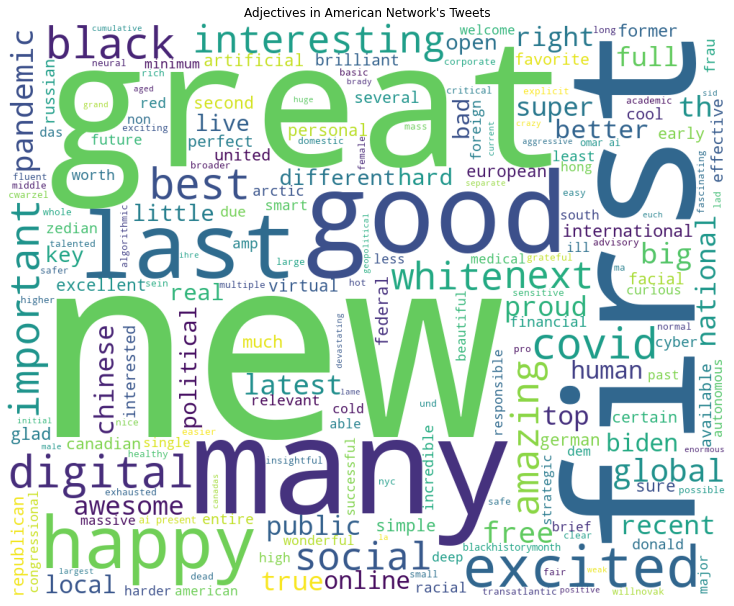

In [298]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Adjectives in American Network's Tweets")
plt.savefig('adjectives_usa.png')
plt.show()

### Complete adjective analysis but change spacy model to german:

In [306]:
# !python3 -m spacy download de_core_news_sm

In [302]:
nlp = spacy.load("de_core_news_sm")

In [305]:
# Tokenization
# spaCy tokenizes the text and creates a document object
tweets_DE['doc'] = [nlp(text) for text in tweets_DE['text']]
tweets_DE.head()

,TweetText,Country,text,doc
0,RT @z_edian: Unser @snv_berlin Expert:innenwor...,Germany,unser snvberlin expertinnenworkshop zur staatl...,"(unser, snvberlin, expertinnenworkshop, zur, s..."
1,RT @rachel_groves: Daily goals: Wake up early....,Germany,daily goals wake up early drink coffee work ha...,"(daily, goals, wake, up, early, drink, coffee,..."
2,RT @michael_adler_: Fing gut an! Bonn braucht ...,Germany,fing gut an bonn braucht einen mindshift von d...,"(fing, gut, an, bonn, braucht, einen, mindshif..."
3,RT @EurAsiaBridgeEU: good topic - well done.,Germany,good topic well done,"(good, topic, , well, done)"
4,"Gestern haben @Lichtemomente, @askans, @michae...",Germany,gestern haben lichtemomente askans michaeladle...,"(gestern, haben, lichtemomente, askans, michae..."


In [307]:
tokens = [token for token in tweets_DE['doc']]

In [308]:
# Define a sample to make sure it works. 
sample = tweets_DE['text'][0]

In [309]:
document = nlp(sample)

In [311]:
for token in document:
    if token.pos_ == 'ADJ':
        print(token, token.pos_)

staatlichen ADJ
böswilligen ADJ


In [312]:
document_all_tweets = tweets_DE['text'].apply(nlp)

In [313]:
adjectives_DE = []

for doc in document_all_tweets:
    for token in doc:
        if token.pos_ == 'ADJ':
            adjectives_DE.append(token)

In [314]:
adjectives_DE

[staatlichen,
 böswilligen,
 mindshift,
 done,
 askans,
 ersten,
 beweggründe,
 persönliche,
 means,
 architekten,
 urban,
 städte,
 linke,
 seite,
 laden,
 zweiten,
 httpstcorjhfciv,
 name,
 languages,
 have,
 quote,
 bonner,
 neue,
 erste,
 heutigen,
 klassischen,
 besitzver,
 gute,
 gründe,
 kältehilfe,
 warmen,
 often,
 votes,
 wasnt,
 enough,
 httpstcojlpqlfuird,
 women,
 stolen,
 httpstcoydbmaryo,
 gaufmans,
 lisasresearch,
 accurate,
 were,
 protests,
 when,
 starts,
 breite,
 abbilden,
 draufwerfe,
 testen,
 alten,
 erhöhten,
 kitas,
 twitter,
 httpstcohzzrmrf,
 normalen,
 fragerunde,
 aussprache,
 vergangenen,
 httpstcowgvnftb,
 parteichef,
 parteitagen,
 wortmeldungenaussprache,
 fragerunde,
 reporting,
 time,
 loudtoo,
 aktuellen,
 thema,
 ausgezeichnete,
 wissenschaftjournalistin,
 rolle,
 europäische,
 europäischer,
 neue,
 europäische,
 launched,
 kaansahinde,
 httpstconuhjfqlo,
 hub,
 together,
 studies,
 pushes,
 cybersecuritygover,
 time,
 recherche,
 ges,
 states,
 ge

In [315]:
# Generate wordcloud of adjectives from German Network's tweets:

comment_words = ''
stopwords = stopwords_de_en

for adj in adjectives_DE:
    adj = str(adj)
    
    tokens = adj.split()
    
    comment_words += " ".join(tokens)+" "
    
wordcloud2 = WordCloud(width=1000, height=800, 
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

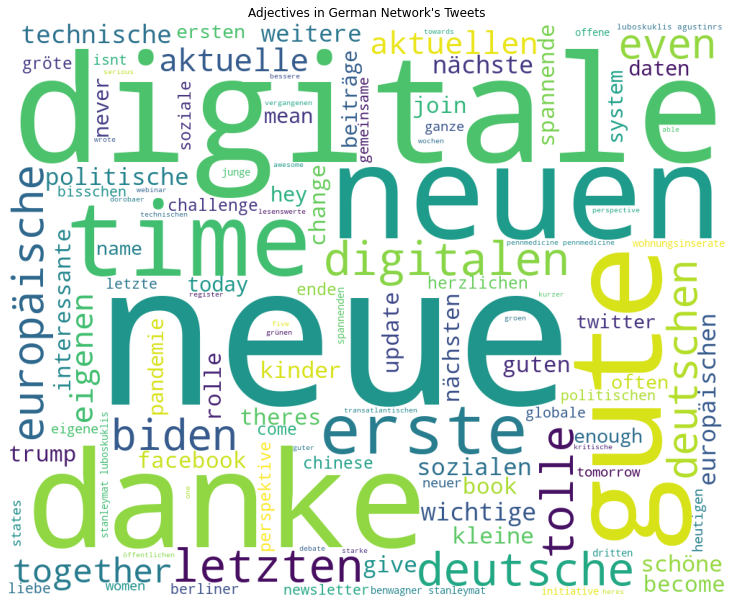

In [317]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Adjectives in German Network's Tweets")
plt.savefig('adjectives_de.png')
plt.show()